In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tinyAG.engine import Value
from tinyAG.nn import Neuron, Layer, MLP
from tinyAG.losses import *

In [2]:
np.random.seed(1337)
random.seed(1337)

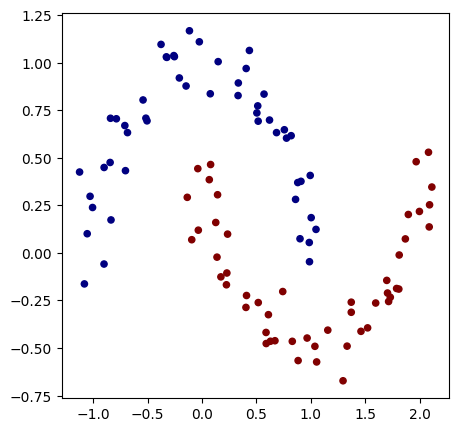

In [8]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(n_samples=100, noise=0.1)
y = y*2 - 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')



In [12]:
model = MLP(2, [16, 16, 1])
print(model)
print('-----------')
print("number of parameters:", len(model.parameters()))

MLP of [
 Layer of [tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2), tanh Neuron(2)] 
 Layer of [tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16), tanh Neuron(16)] 
 Layer of [linear Neuron(16)] 
]
-----------
number of parameters: 337


In [14]:
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).tanh() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.7968554200898329) 0.18
